--- Đang tải dữ liệu từ: mobiles_dataset_2025_processed.csv ---
Tải dữ liệu thành công.
Đã chuẩn hóa các cột đặc trưng.
Đã lưu cỗ máy chuẩn hóa vào: preprocessor.pkl

--- Đang chạy phương pháp Elbow để tìm K (từ 1 đến 10)... ---
Đã xong! Đang hiển thị đồ thị Elbow...


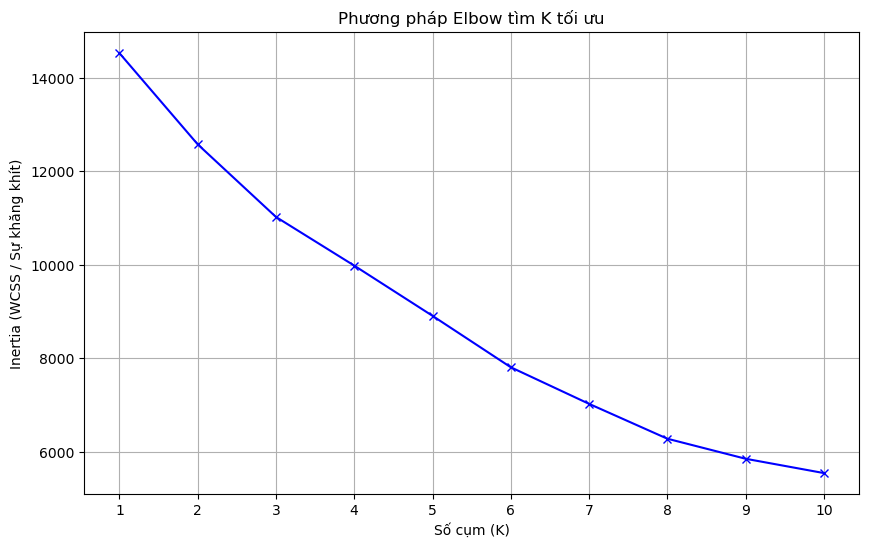


--- CHẠY MÔ HÌNH CUỐI CÙNG ---
Vui lòng nhìn vào đồ thị Elbow vừa hiển thị và quyết định số K tốt nhất.
Đã chọn K = 3. Đang chạy mô hình K-means cuối cùng...

----------- KẾT QUẢ PHÂN CỤM (CHI TIẾT - ĐẦY ĐỦ CỘT) -----------
     RAM  Front Camera  Back Camera  Battery Capacity  Screen Size  \
0      6           1.2          4.8              3.60         6.10   
1      6           1.2          4.8              3.60         6.10   
2      6           1.2          4.8              3.60         6.10   
3      6           1.2          4.8              4.20         6.70   
4      6           1.2          4.8              4.20         6.70   
..   ...           ...          ...               ...          ...   
878    6           2.0          4.8              4.52         6.67   
877    4           0.8          4.8              6.00         6.53   
876    6           2.0          6.4              5.16         6.67   
101    8           1.2          5.0              4.00         6.10   
99   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

FILE_PATH = "mobiles_dataset_2025_processed.csv"

NUMERIC_FEATURES = [
    'RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 
    'Screen Size', 'ROM','Launched Price (USA)',
    'Company_Apple', 'Company_Honor', 'Company_Oppo', 'Company_Other', 
    'Company_Samsung', 'Company_Vivo', 'Processor_vec1', 'Processor_vec2', 
    'Processor_vec3'
]

CATEGORICAL_FEATURES = []
MAX_K_TO_TEST = 10 

print(f"--- Đang tải dữ liệu từ: {FILE_PATH} ---")

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file tại '{FILE_PATH}'.")
    exit()
except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file: {e}")
    exit()

print("Tải dữ liệu thành công.")

try:
    df_to_process = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]
except KeyError:
    print("LỖI: Tên cột trong NUMERIC_FEATURES không khớp với file CSV.")
    exit()

numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERIC_FEATURES)
    ],
    remainder='passthrough'
)
X_preprocessed = preprocessor.fit_transform(df_to_process)
print("Đã chuẩn hóa các cột đặc trưng.")

preprocessor_filename = "preprocessor.pkl"
joblib.dump(preprocessor, preprocessor_filename)
print(f"Đã lưu cỗ máy chuẩn hóa vào: {preprocessor_filename}")

print(f"\n--- Đang chạy phương pháp Elbow để tìm K (từ 1 đến {MAX_K_TO_TEST})... ---")
inertia_list = []
K_range = range(1, MAX_K_TO_TEST + 1)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_model.fit(X_preprocessed)
    inertia_list.append(kmeans_model.inertia_)

print("Đã xong! Đang hiển thị đồ thị Elbow...")
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia_list, 'bx-')
plt.xlabel('Số cụm (K)')
plt.ylabel('Inertia (WCSS / Sự khăng khít)')
plt.title('Phương pháp Elbow tìm K tối ưu')
plt.grid(True)
plt.xticks(K_range)
plt.show()

print("\n--- CHẠY MÔ HÌNH CUỐI CÙNG ---")
print("Vui lòng nhìn vào đồ thị Elbow vừa hiển thị và quyết định số K tốt nhất.")

while True:
    try:
        BEST_K = int(input(f"Nhập số K bạn chọn (từ 2 đến {MAX_K_TO_TEST}): "))
        if 2 <= BEST_K <= MAX_K_TO_TEST:
            break
        else:
            print(f"Vui lòng nhập một số trong khoảng 2 đến {MAX_K_TO_TEST}.")
    except ValueError:
        print("Vui lòng nhập một con số nguyên.")

print(f"Đã chọn K = {BEST_K}. Đang chạy mô hình K-means cuối cùng...")

final_model = KMeans(
    n_clusters=BEST_K, 
    init='k-means++', 
    n_init=10, 
    random_state=42
)

clusters = final_model.fit_predict(X_preprocessed)
df['Cluster'] = clusters

print("\n----------- KẾT QUẢ PHÂN CỤM (CHI TIẾT - ĐẦY ĐỦ CỘT) -----------")
print(df.sort_values(by='Cluster'))
print("\n")

model_filename = "kmeans_model.pkl"
joblib.dump(final_model, model_filename)
print(f"ĐÃ LƯU MODEL K-MEANS VÀO FILE: {model_filename}")

print(f"--- ĐẶC ĐIỂM TRUNG BÌNH CỦA {BEST_K} CỤM ---")
cluster_summary = df.groupby('Cluster')[NUMERIC_FEATURES].mean()
print(cluster_summary)

print(f"\n--- DÁN NHÃN THỦ CÔNG ---")
print(f"Lần lượt nhập {BEST_K} tên nhãn cho từng cụm (từ 0 đến {BEST_K-1}).")

label_mapping = {}

for k in range(BEST_K):
    label_name = input(f"Nhập tên nhãn (label) cho Cluster {k}: ")
    label_mapping[k] = label_name

print("\nĐã tạo bản đồ nhãn (label mapping) sau:")
print(label_mapping)


df.to_csv("mobiles_dataset_2025_clustered_labeled.csv", index=False)
print("Đã lưu DataFrame với nhãn phân khúc vào 'mobiles_dataset_2025_clustered_labeled.csv'")

df['PhanKhuc'] = df['Cluster'].map(label_mapping)

print("\n----------- KẾT QUẢ SAU KHI DÁN NHÃN -----------")
print("Đây là DataFrame đầy đủ với cột 'PhanKhuc' mới:")
print(df.sort_values(by='Cluster'))


print("\n----------- TÓM TẮT SỐ LƯỢNG PHÂN KHÚC -----------")
print(df['PhanKhuc'].value_counts())

print("\n--- KẾT THÚC CHƯƠNG TRÌNH ---")
